# TITANIC SURVIVAL DATA ANALYSIS

In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
titanic_df=pd.read_csv('train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

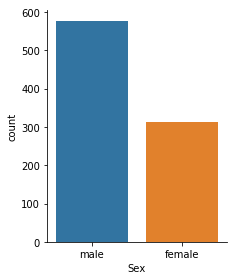

In [7]:
sns.catplot('Sex',kind="count",data=titanic_df, height=4, aspect=.8)


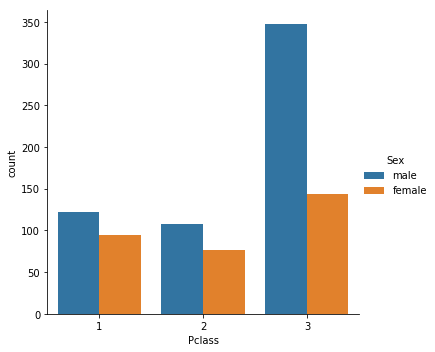

In [8]:
sns.catplot('Pclass',kind="count", data=titanic_df, hue="Sex")

In [9]:
def age_sex_passenger(passenger):
    age,sex=passenger
    if age<18:
        return 'child'
    else:
        return sex

In [10]:
titanic_df['Person']=titanic_df[['Age','Sex']].apply(age_sex_passenger,axis=1)

In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


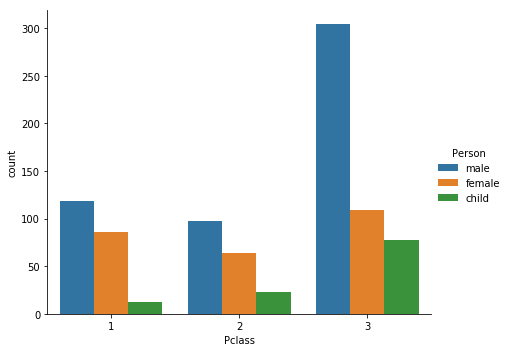

In [12]:
sns.catplot("Pclass",kind="count", data = titanic_df, hue = "Person", aspect=1.2)

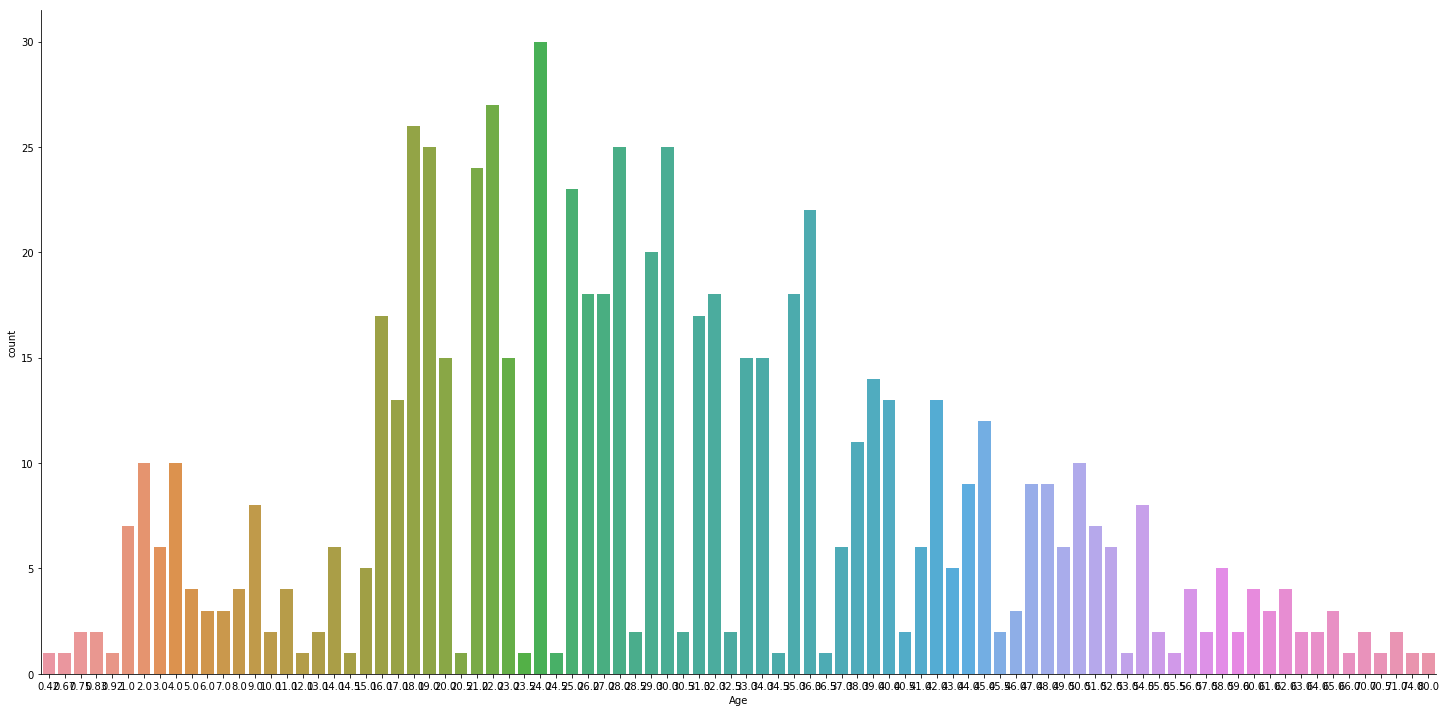

In [13]:
sns.catplot("Age", kind = "count", data = titanic_df, aspect=2, height=10)

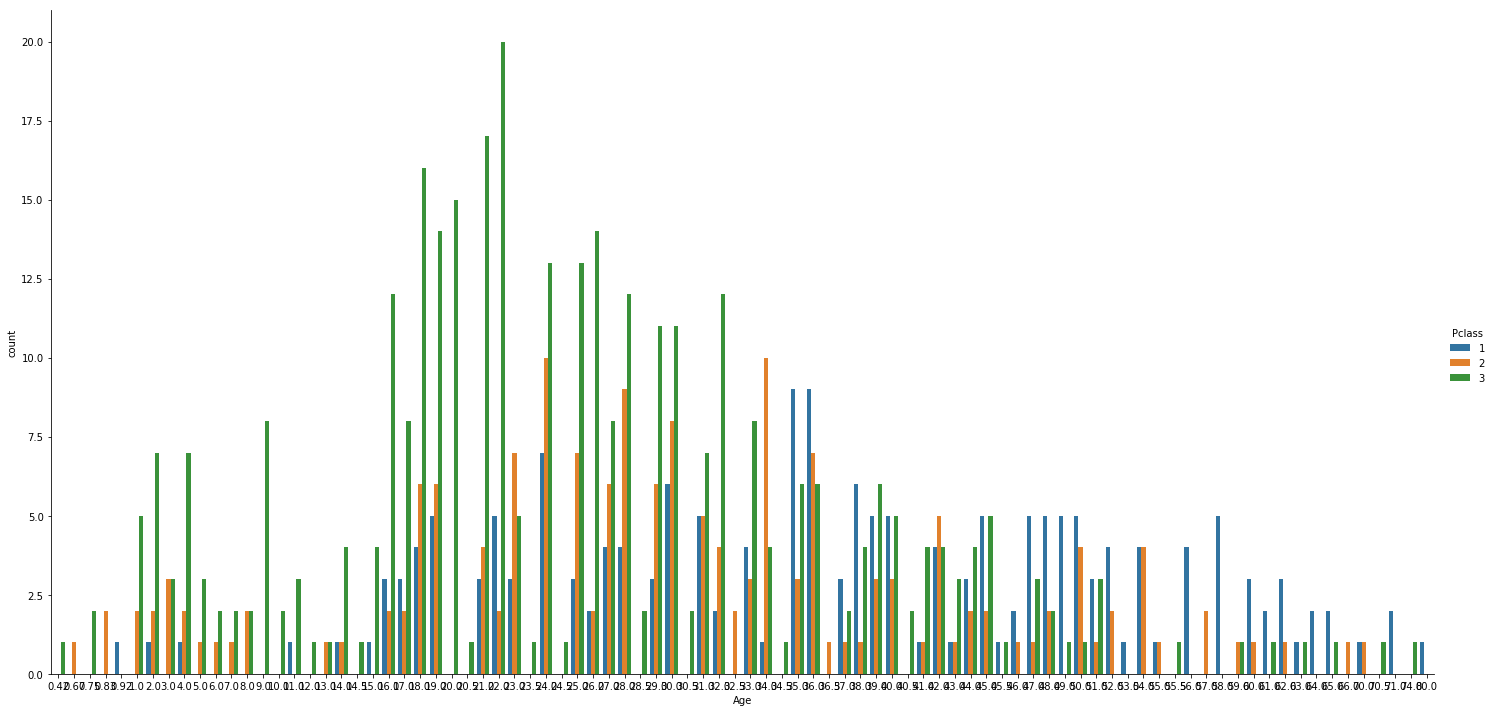

In [14]:
sns.catplot("Age", kind = "count", data = titanic_df, hue = "Pclass", aspect=2, height=10)

In [15]:
titanic_df['Person'].value_counts()


male      519
female    259
child     113
Name: Person, dtype: int64

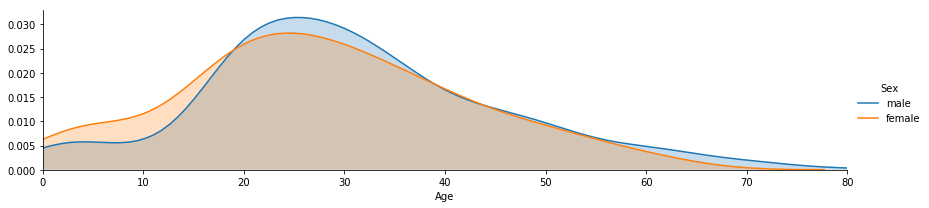

In [16]:
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

fig.map(sns.kdeplot,'Age',shade= True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

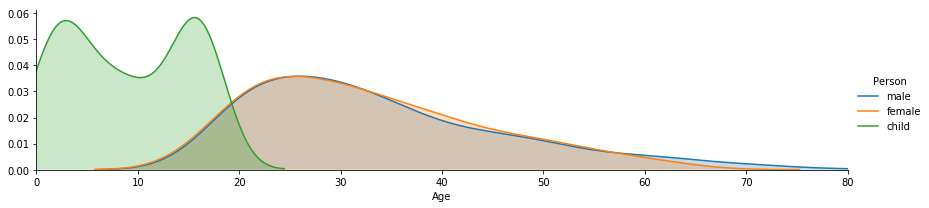

In [17]:
fig = sns.FacetGrid(titanic_df, hue="Person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

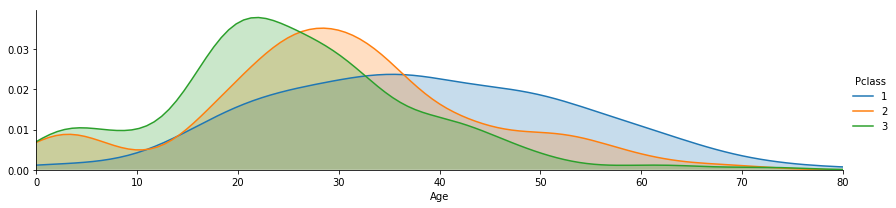

In [18]:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [19]:
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [20]:
deck = titanic_df['Cabin'].dropna()

In [21]:
deck.head()


1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

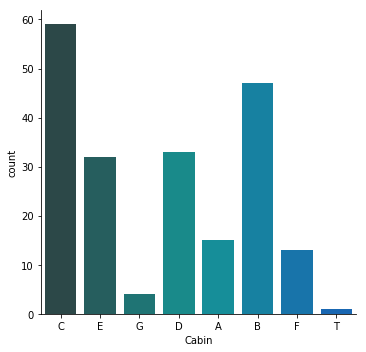

In [22]:
levels = []

for level in deck:
    levels.append(level[0])    

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin',kind = "count", data=cabin_df,palette='winter_d')

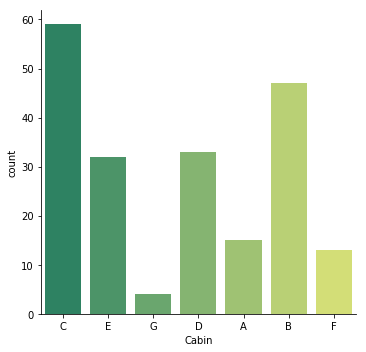

In [23]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot('Cabin',kind= "count",data=cabin_df,palette='summer',)